In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
data=pd.read_csv('/content/mydrive/MyDrive/Colab Notebooks/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


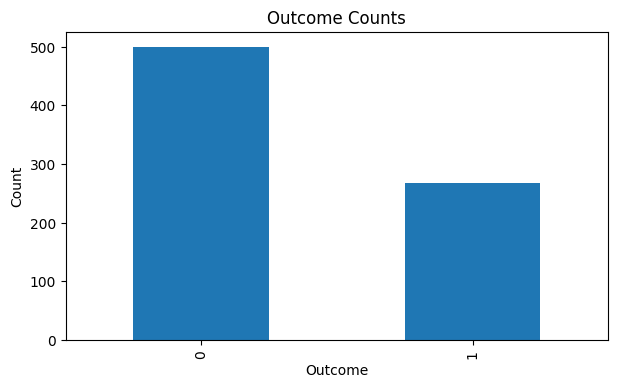

In [ ]:
# Checking outcome count
data['Outcome'].value_counts().plot(kind='bar',figsize=(7,4))
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Counts')
plt.show()

In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Quan sát: Trong số 768 giá trị có 500 trường hợp có giá trị 0 và 268 trường hợp có giá trị là 1. Vì vậy, lớp 1 hầu như không chiếm 34% dữ liệu tổng thể. Điều này nêu rõ trường hợp mất cân bằng.

In [ ]:
data.shape

(768, 9)

In [ ]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


Nhận thấy rằng có nhiều cột có giá trị tối thiểu bằng 0

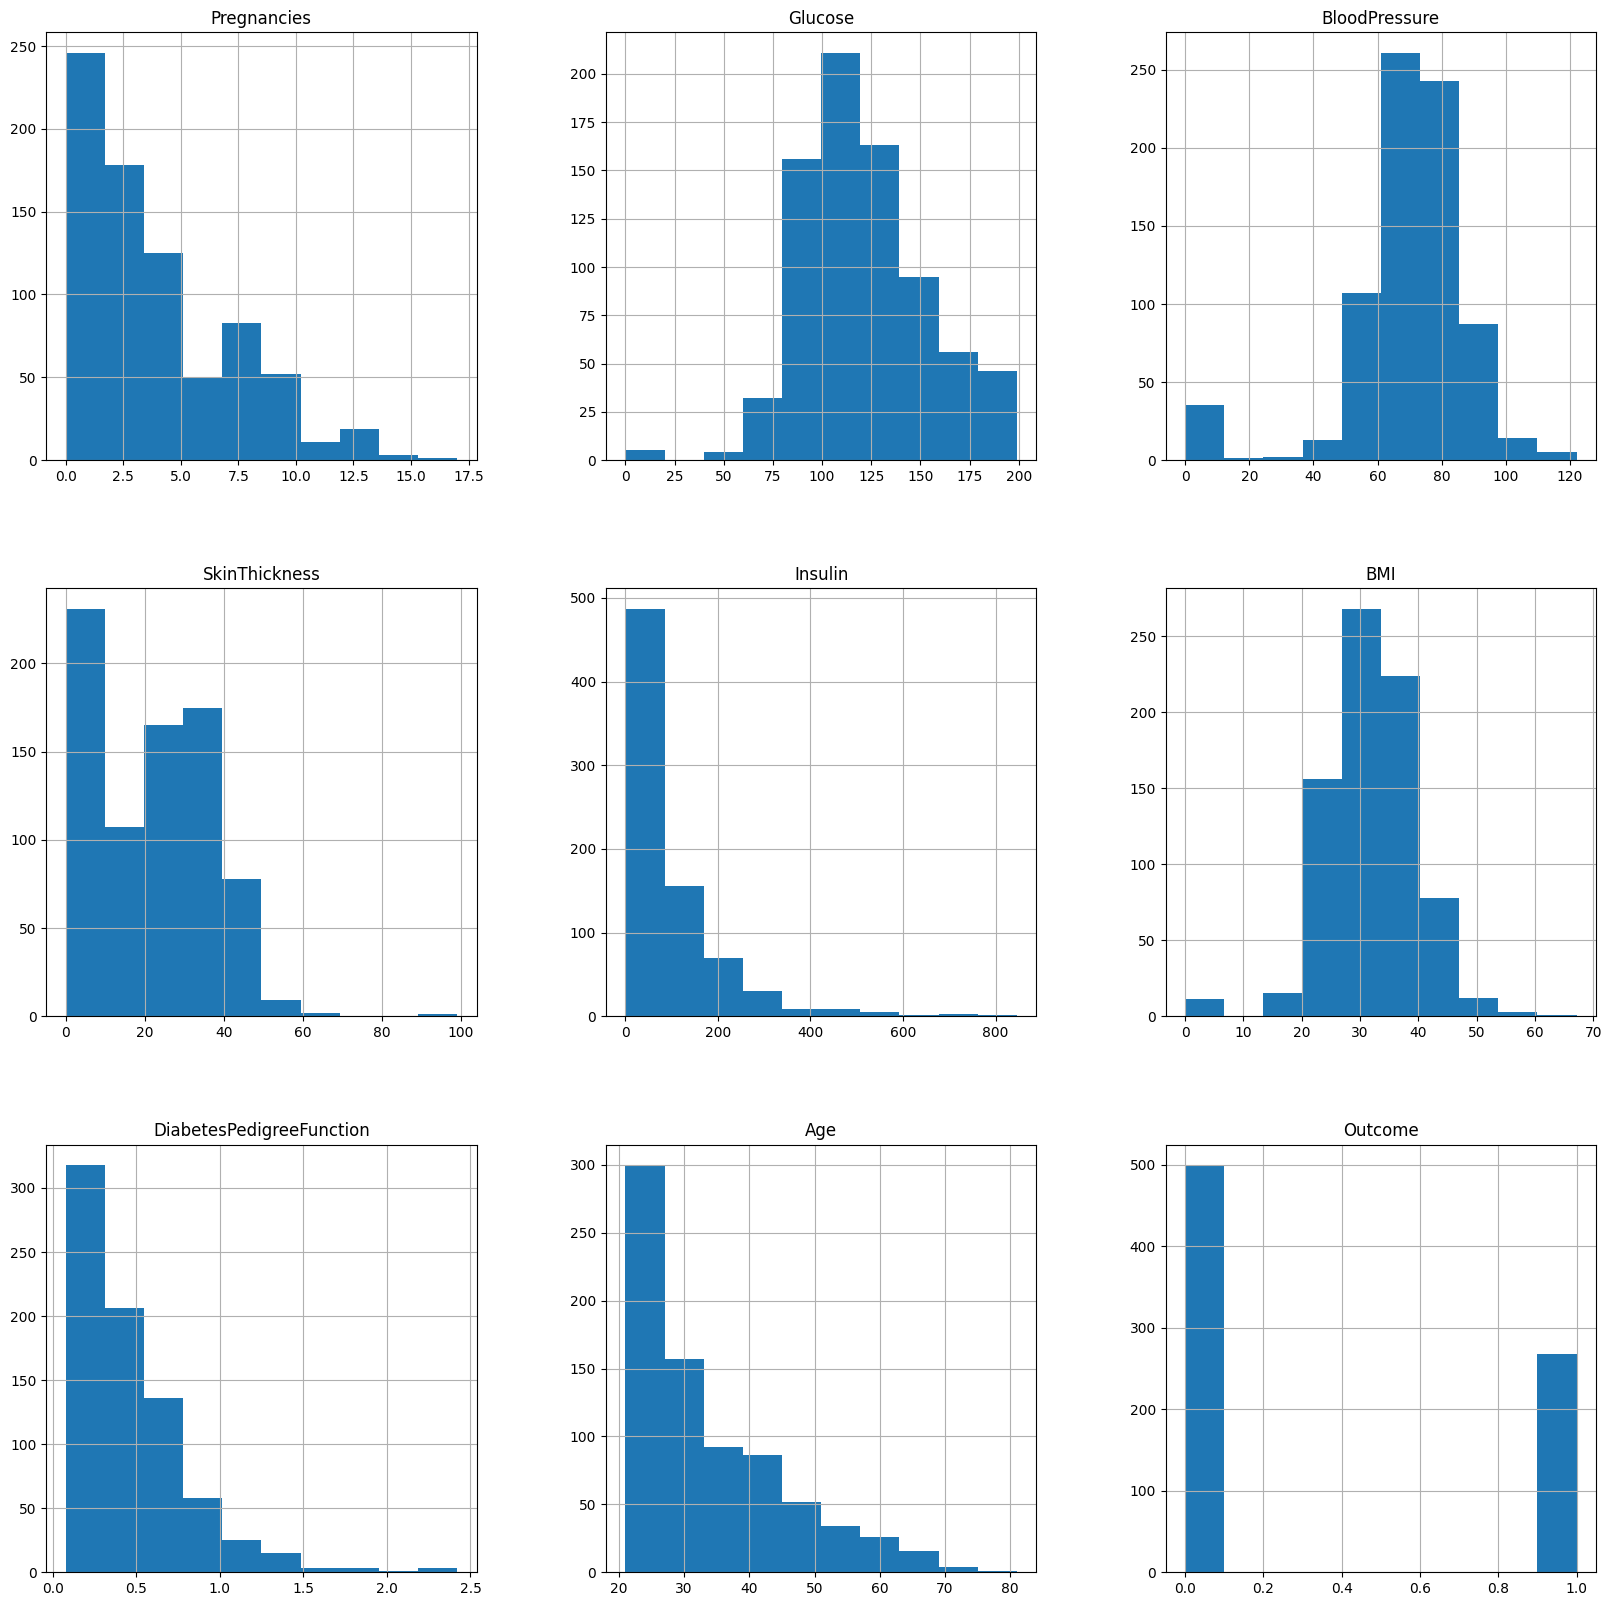

In [ ]:
# Histogram of data
data.hist(figsize=(20,20))
plt.show()

Quan sát: Khi tham chiếu đến biểu đồ, có nhiều tính năng (cột) bị thiếu dữ liệu và chúng ta cần thay thế giá trị 0 đó bằng giá trị trung bình Lưu ý: Có thể bệnh nhân không mang thai nên cột Mang thai có thể bằng 0. Do đó loại trừ cột mang thai. Tuy nhiên Glucose, BloodPressure, SkinThickness, Insulin & BMI có thể bằng 0.

Quy trình thay thế giá trị 0 để làm sạch dữ liệu

1 Tính giá trị trung bình, loại trừ giá trị 0

2 Thay thế giá trị 0 bằng giá trị trung bình

In [ ]:
columns_to_replace_Zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_replace_Zero:
    mean_value = data[data[column] != 0][column].mean()
    data[column] = data[column].replace(0, mean_value)

In [ ]:
# Kiểm tra dữ liệu sau khi thay thế giá trị 0
data.describe().transpose().round(2) #Updated values

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,121.69,30.44,44.00,99.75,117.00,140.25,199.00
BloodPressure,768.0,72.41,12.10,24.00,64.00,72.20,80.00,122.00
SkinThickness,768.0,29.15,8.79,7.00,25.00,29.15,32.00,99.00
Insulin,768.0,155.55,85.02,14.00,121.50,155.55,155.55,846.00
BMI,768.0,32.46,6.88,18.20,27.50,32.40,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


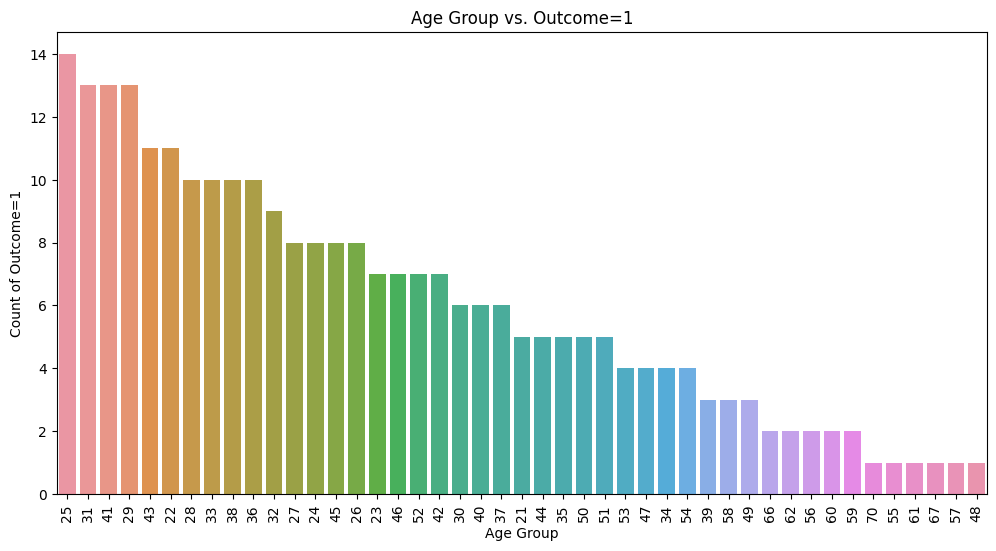

In [ ]:
# Kiểm tra nhóm tuổi có số lượng bệnh nhân tiểu đường cao nhất
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=data[data['Outcome'] == 1], order=data[data['Outcome'] == 1]['Age'].value_counts().index)
plt.title('Age Group vs. Outcome=1')
plt.xlabel('Age Group')
plt.ylabel('Count of Outcome=1')
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc hơn
plt.show()

Biểu đồ trên cho thấy số lượng bệnh nhân tiểu đường cao nhất được phát hiện ở độ tuổi 25 và tiếp theo là độ tuổi 31. Điều này cho chúng ta giả định rằng bệnh nhân trong độ tuổi 25-31 có nguy cơ mắc bệnh tiểu đường cao.

In [ ]:
correlation_matrix = data.corr().round(2)
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.13,0.21,0.08,0.06,0.02,-0.03,0.54,0.22
Glucose,0.13,1.00,0.22,0.19,0.42,0.23,0.14,0.27,0.49
BloodPressure,0.21,0.22,1.00,0.19,0.07,0.28,-0.00,0.32,0.17
SkinThickness,0.08,0.19,0.19,1.00,0.16,0.54,0.10,0.13,0.22
Insulin,0.06,0.42,0.07,0.16,1.00,0.17,0.10,0.14,0.21
BMI,0.02,0.23,0.28,0.54,0.17,1.00,0.15,0.03,0.31
DiabetesPedigreeFunction,-0.03,0.14,-0.00,0.10,0.10,0.15,1.00,0.03,0.17
Age,0.54,0.27,0.32,0.13,0.14,0.03,0.03,1.00,0.24
Outcome,0.22,0.49,0.17,0.22,0.21,0.31,0.17,0.24,1.00


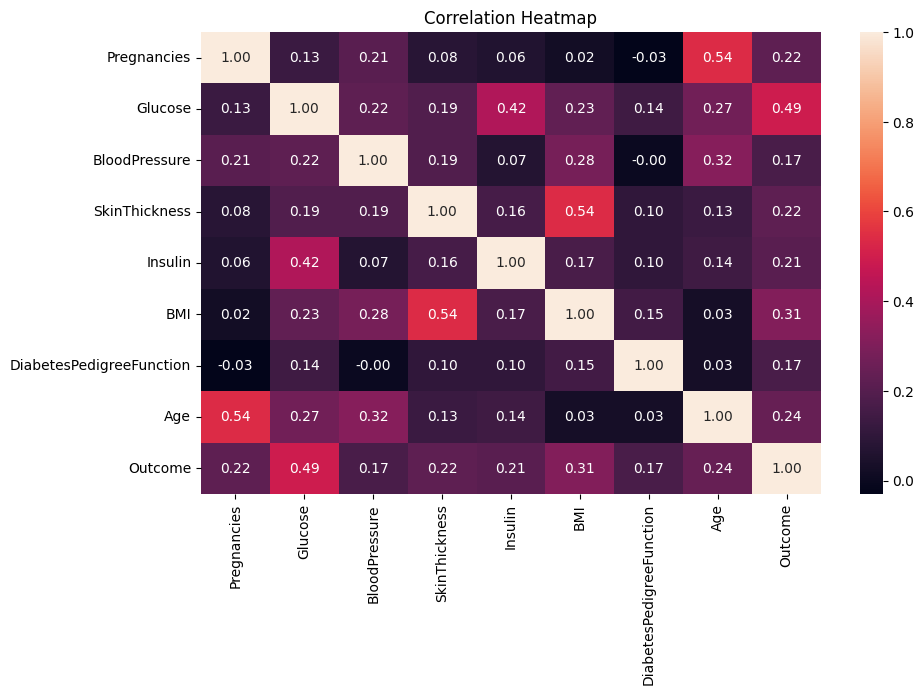

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Nhận xét: Glucose có mối tương quan cao nhất với bệnh tiểu đường.

<Figure size 1000x600 with 0 Axes>

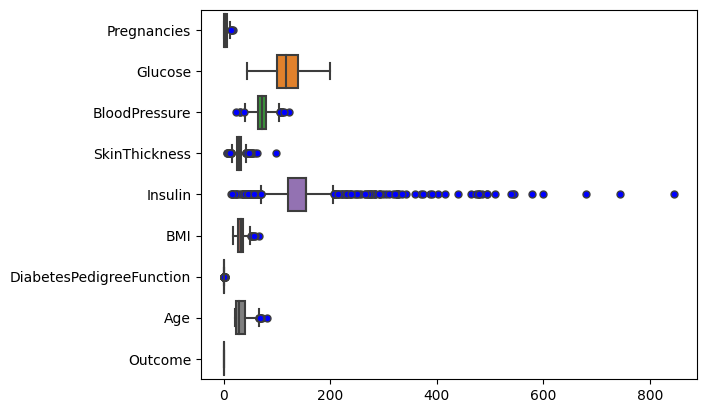

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.boxplot(data, orient='h', flierprops={'markerfacecolor': 'blue', 'marker': 'o'})
plt.figure(figsize=(10,6))

Quan sát: Các ngoại lệ được nhận thấy trong cột glucose, loại bỏ các ngoại lệ từ DataFrame đầu vào chúng có thể làm sai lệch kết quả phân tích và dẫn đến những kết luận không chính xác

In [ ]:
def remove_outlier (dataFrame):
  for column_name in dataFrame.columns:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print(f"{column_name} >> Lower limit: {lower_limit} \n Upper limit: {upper_limit}")
    dataFrame = dataFrame[(dataFrame[column_name] > lower_limit)|(dataFrame[column_name] < upper_limit)]

  return dataFrame

In [ ]:
data = remove_outlier(data)

Pregnancies >> Lower limit: -6.5 
 Upper limit: 13.5
Glucose >> Lower limit: 39.0 
 Upper limit: 201.0
BloodPressure >> Lower limit: 40.0 
 Upper limit: 104.0
SkinThickness >> Lower limit: 14.5 
 Upper limit: 42.5
Insulin >> Lower limit: 70.42766497461929 
 Upper limit: 206.62055837563452
BMI >> Lower limit: 13.849999999999998 
 Upper limit: 50.25
DiabetesPedigreeFunction >> Lower limit: -0.32999999999999996 
 Upper limit: 1.2
Age >> Lower limit: -1.5 
 Upper limit: 66.5
Outcome >> Lower limit: -1.5 
 Upper limit: 2.5


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [ ]:
data.shape

(768, 9)

In [ ]:
# Tách dữ liệu trong các tính năng và cột đầu ra.
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = data['Outcome'].values

In [ ]:
# Chia tỷ lệ các tính năng đầu vào thành bộ chia tiêu chuẩn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = data['Outcome']

In [ ]:
print(X)
print(Y)

[[0.35294118 0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.29411765 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.05882353 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.05882353 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_test.shape

(154, 8)

Xây dựng & Đào tạo Mô hình

In [ ]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=110, random_state=42,criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=110, random_state=42)

Making prediction

Making prediction on test by using logistic Regression

In [ ]:
lr_pred = logReg.predict(X_test)

Making prediction on test by using svm

In [ ]:
sv_pred = classifier.predict(X_test)

Making prediction on test by using Random Forest

In [ ]:
rf_pred = model.predict(X_test)

Đánh giá mô hình

Train score & Test score

In [ ]:
# Train score & Test score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression", logReg.score(X_train,y_train)*100)
print("Accuracy (Test) score of Logistic Regression", logReg.score(X_test, y_test)*100)
print("Accuracy (Test) score of Logistic Regression", accuracy_score(y_test, lr_pred)*100)

Train accuracy of Logistic Regression 76.2214983713355
Accuracy (Test) score of Logistic Regression 77.92207792207793
Accuracy (Test) score of Logistic Regression 77.92207792207793


In [ ]:
# Train score & Test score of SVM
print("Train accuracy of SVM", classifier.score(X_train,y_train)*100)
print("Accuracy (Test) score of SVM", classifier.score(X_test, y_test)*100)
print("Accuracy score of SVM", accuracy_score(y_test, sv_pred)*100)

Train accuracy of SVM 76.54723127035831
Accuracy (Test) score of SVM 77.27272727272727
Accuracy score of SVM 77.27272727272727


In [ ]:
# Train score & Test score of Random Forest
print("Train accuracy of Random Forest", model.score(X_train,y_train)*100)
print("Accuracy (Test) score of Random Forest", model.score(X_test, y_test)*100)
print("Accuracy score of Random Forest", accuracy_score(y_test, rf_pred)*100)

Train accuracy of Random Forest 100.0
Accuracy (Test) score of Random Forest 75.97402597402598
Accuracy score of Random Forest 75.97402597402598


Confution Matrix

Số liệu nhầm lẫn là một bảng được sử dụng để mô tả hiệu suất của một vấn đề phân loại.
Nó trực quan hóa độ chính xác của bộ phân loại bằng cách so sánh các giá trị dự đoán với giá trị thực tế.
Các thuật ngữ được sử dụng trong số liệu gây nhầm lẫn là Dương tính thật (TP), âm tính thật (TN), dương tính giả (FP) và âm tính giả (FN)
Dương tính thực sự: Kết quả được dự đoán là dương tính, trong khi nó được dán nhãn là dương tính.
Dương tính giả: Kết quả được dự đoán là dương tính trong khi được dán nhãn là âm tính. Nó cũng gọi là Lỗi loại I.
Âm tính giả: Kết quả được dự đoán là âm tính trong khi được gắn nhãn là dương tính. Nó cũng gọi là Lỗi loại II.
Đúng Âm tính: Kết quả được dự đoán là âm tính, trong khi nó được gắn nhãn là âm tính.

Confusion matrix of Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test, lr_pred)
cm

array([[87, 12],
       [22, 33]])

<Axes: >

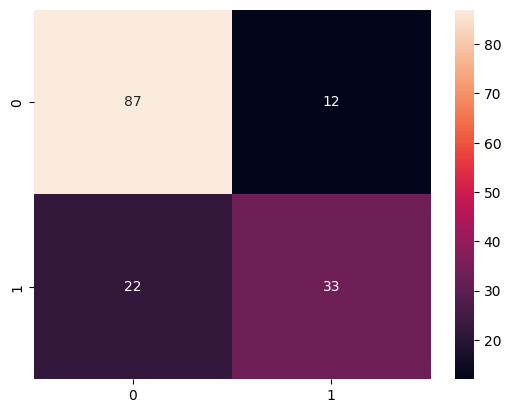

In [ ]:
sns.heatmap(cm,annot=True,fmt="d")

Qua ma trận nhầm lẫn (confusion matrix) chúng ta có thể thấy model dự đoán sai nhiều nhóm (class) 1-nhóm bị bệnh tiểu đường. Độ chuẩn xác (precision) đạt 0.73 tức là có 73% cá thể (instance) được dự đoán thuộc nhóm (class) 1 là chính xác. Điều này có thể lý giải nguyên nhân là do chúng ta không có nhiều dữ liệu về nhóm (class) 1 trong tập dữ liệu huấn luyện (training set), phần lớn đều được thay thế các giá trị 0 bằng giá trị trung bình của cột, do đó mức độ tổng quát (generalize) của model chưa được cao. Nhìn về khía cạnh khác, độ bao phủ (recall) của nhóm (class) 1 cũng chỉ đạt 0.60, 60% cá thể (instance) có nhãn (label) là nhóm (class) 1 được dự đoán đúng có 22 cá thể (instance) có nhãn (label) là nhóm (class) 1 nhưng bị phân loại sai thành nhóm (class) 0.

In [ ]:
print(classification_report(y_test, lr_pred ))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        99
           1       0.73      0.60      0.66        55

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



Điểm chính xác là 0,73 cho thấy rằng, trong số các mẫu được dự đoán là dương tính (bệnh tiểu đường), 73% trong số đó là dương tính thực sự. Độ chính xác là thước đo mức độ mô hình xác định các trường hợp dương tính đồng thời giảm thiểu các trường hợp dương tính giả. Tóm lại, độ chính xác là 0,78, cùng với điểm chính xác là 0,73.

In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, lr_pred))
print("Precision: (Điểm chính xác)",precision_score(y_test, lr_pred))

Accuracy:(Độ chính xác) 0.7792207792207793
Precision: (Điểm chính xác) 0.7333333333333333


Confusion matrix of SVM

In [ ]:
cm_svm = confusion_matrix(y_test, sv_pred)
cm_svm

array([[85, 14],
       [21, 34]])

<Axes: >

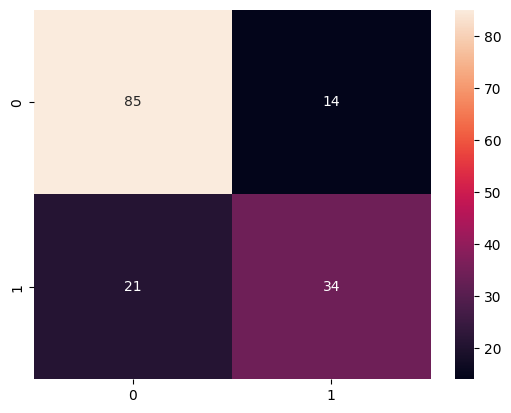

In [ ]:
sns.heatmap(cm_svm,annot=True,fmt="d")

Qua ma trận nhầm lẫn (confusion matrix) chúng ta có thể thấy model dự đoán sai khá nhiều nhóm (class) 1-nhóm bị bệnh tiểu đường. Độ chuẩn xác (precision) chỉ đạt 0.71 tức là chỉ có 71% cá thể (instance) được dự đoán thuộc nhóm (class) 1 là chính xác. Nhìn về khía cạnh khác, độ bao phủ (recall) của nhóm (class) 1 cũng chỉ đạt 0.62, 62% cá thể (instance) có nhãn (label) là nhóm (class) 1 được dự đoán đúng có 21 cá thể (instance) có nhãn (label) là nhóm (class) 1 nhưng bị phân loại sai thành nhóm (class) 0.

In [ ]:
print(classification_report(y_test, sv_pred ))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



Điểm chính xác là 0,71 cho thấy rằng, trong số các mẫu được dự đoán là dương tính (bệnh tiểu đường), 71% trong số đó là dương tính thực sự. Độ chính xác là 0,77, cùng với điểm chính xác là 0,71.

In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, sv_pred))
print("Precision: (Điểm chính xác)",precision_score(y_test, sv_pred))

Accuracy:(Độ chính xác) 0.7727272727272727
Precision: (Điểm chính xác) 0.7083333333333334


Confusion matrix of Random Forest

In [ ]:
cm_rf = confusion_matrix(y_test, rf_pred)
cm_rf

array([[79, 20],
       [17, 38]])

<Axes: >

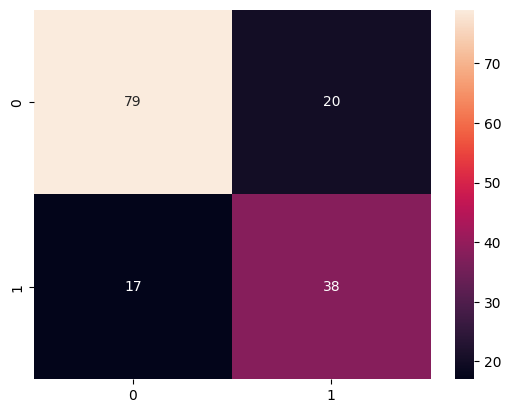

In [ ]:
sns.heatmap(cm_rf,annot=True,fmt="d")

Qua ma trận nhầm lẫn (confusion matrix) chúng ta có thể thấy model dự đoán sai khá nhiều nhóm (class) 1-nhóm bị bệnh tiểu đường. Độ chuẩn xác (precision) chỉ đạt 0.66 tức là chỉ có 66% cá thể (instance) được dự đoán thuộc nhóm (class) 1 là chính xác. Nhìn về khía cạnh khác, độ bao phủ (recall) của nhóm (class) 1 là khá tốt đạt 0.69, 69% cá thể (instance) có nhãn (label) là nhóm (class) 1 được dự đoán đúng chỉ có 17 cá thể (instance) có nhãn (label) là nhóm (class) 1 nhưng bị phân loại sai thành nhóm (class) 0.

In [ ]:
print(classification_report(y_test, rf_pred ))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        99
           1       0.66      0.69      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



Điểm chính xác là 0,66 cho thấy rằng, trong số các mẫu được dự đoán là dương tính (bệnh tiểu đường), 66% trong số đó là dương tính thực sự. Độ chính xác là 0,76, cùng với điểm chính xác là 0,76.

In [ ]:
print("Accuracy:(Độ chính xác)",accuracy_score(y_test, rf_pred))
print("Precision: (Điểm chính xác)",precision_score(y_test, rf_pred))

Accuracy:(Độ chính xác) 0.7597402597402597
Precision: (Điểm chính xác) 0.6551724137931034


Thông qua 3 mô hình ta thấy độ chính xác của mô hình hồi quy logistic là cao nhất 78%

Xây dựng hệ thống dự đoán

In [ ]:
input_data = (8,99,84,0,0,35.4,0.388,50)
# thay đổi input_data thành mảng có nhiều mảng
input_data_as_numpy_array = np.asarray(input_data)

#định hình lại mảng như chúng ta đang dự đoán trong một trường hợp
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#chuẩn hóa dữ liệu đầu vào
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = logReg.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.47058824  0.35483871  0.6122449  -0.07608696 -0.01682692  0.35173824
   0.1323655   0.48333333]]
[0]
The person is not diabetic


In [ ]:
input_data = (8,99,84,0,0,35.4,0.388,50)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.47058824  0.35483871  0.6122449  -0.07608696 -0.01682692  0.35173824
   0.1323655   0.48333333]]
[0]
The person is not diabetic


In [ ]:
input_data = (0,137,40,35,168,43.1,2.288,33)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[0.         0.6        0.16326531 0.30434783 0.18509615 0.50920245
  0.94363792 0.2       ]]
[1]
The person is diabetic


In [ ]:
# 0,137,40,35,168,43.1,2.288,33,1
# 5,116,74,0,0,25.6,0.201,30,0
# 3,158,76,36,245,31.6,0.851,28,1